In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("lending_train.csv"); val = "train"
# df = pd.read_csv("lending_topredict.csv"); val = "test"
df.head()

,ID,requested_amnt,loan_duration,employment,employment_length,race,reason_for_loan,extended_reason,annual_income,debt_to_income_ratio,...,delinquency_last_2yrs,fico_score_range_low,fico_score_range_high,fico_inquired_last_6mths,months_since_last_delinq,revolving_balance,total_revolving_limit,type_of_application,any_tax_liens,loan_paid
0,0,32000.0,60 months,SVP,4 years,W,debt_consolidation,Debt consolidation,250000.0,16.35,...,0.0,775.0,779.0,0.0,NaN,22480.0,105700.0,Individual,0.0,1
1,1,6000.0,36 months,METAL FABRICATION SUPERVISOR,10+ years,B,home_improvement,Home improvement,70000.0,15.22,...,0.0,650.0,654.0,1.0,30.0,6313.0,14600.0,Individual,0.0,1
2,2,4200.0,36 months,insurance collector specialist,10+ years,W,debt_consolidation,Debt consolidation,37000.0,20.99,...,1.0,665.0,669.0,0.0,11.0,4482.0,10300.0,Individual,0.0,1
3,3,9725.0,36 months,Kitchen Manager,10+ years,W,debt_consolidation,Debt consolidation,45000.0,37.76,...,0.0,705.0,709.0,0.0,NaN,21705.0,25200.0,Individual,0.0,1
4,4,24000.0,36 months,Appeals Specialist,10+ years,B,debt_consolidation,Debt consolidation,86000.0,32.10,...,0.0,650.0,654.0,0.0,76.0,30406.0,104200.0,Individual,0.0,1


In [7]:
df.shape

(1000000, 25)

<AxesSubplot:>

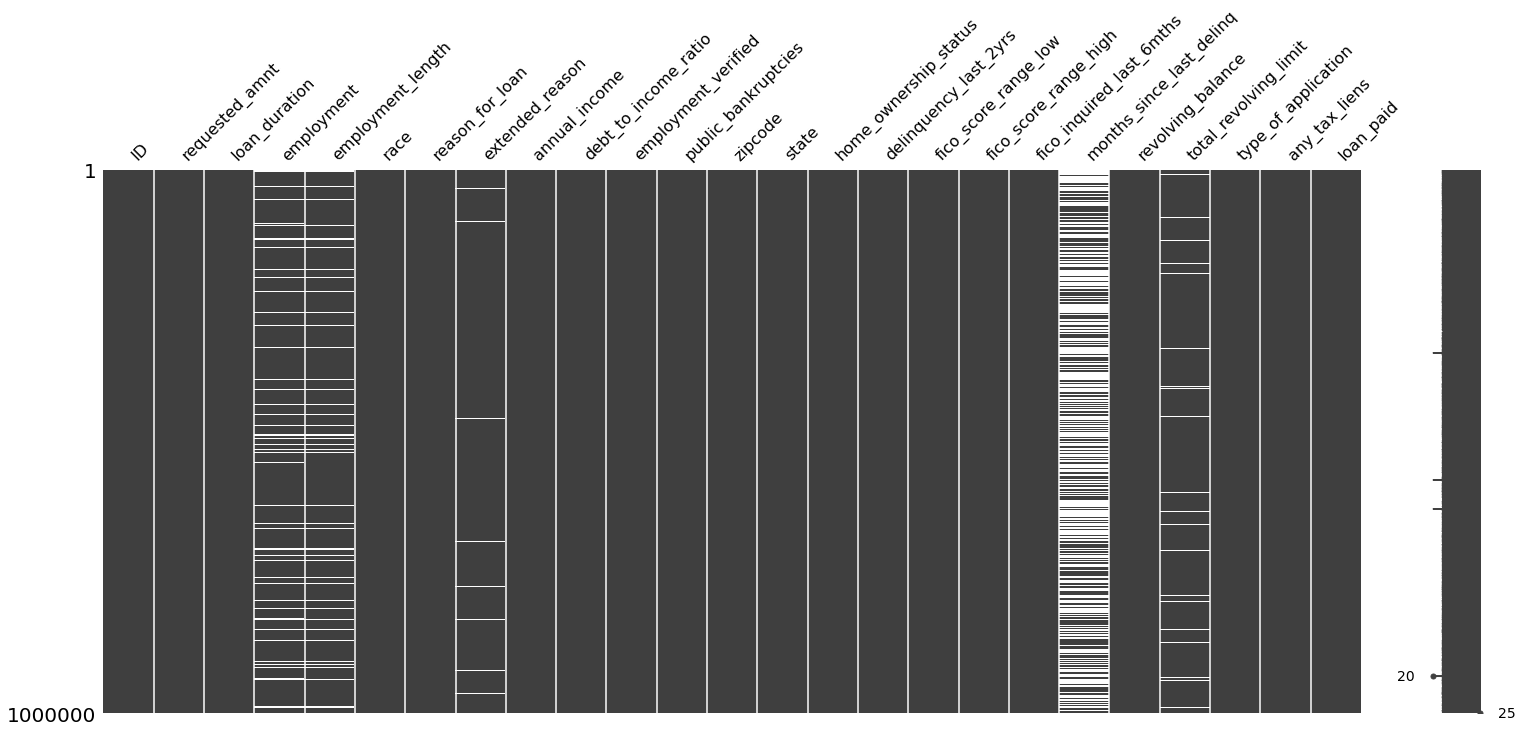

In [8]:
msno.matrix(df)

In [9]:
df.isnull().sum(axis = 0)

ID                               0
requested_amnt                   0
loan_duration                    0
employment                   63562
employment_length            58152
race                             0
reason_for_loan                  0
extended_reason              12425
annual_income                    0
debt_to_income_ratio           278
employment_verified              0
public_bankruptcies            516
zipcode                          1
state                            0
home_ownership_status            0
delinquency_last_2yrs            0
fico_score_range_low             0
fico_score_range_high            0
fico_inquired_last_6mths         1
months_since_last_delinq    504309
revolving_balance                0
total_revolving_limit        50231
type_of_application              0
any_tax_liens                   28
loan_paid                        0
dtype: int64

## Feature Cleaning & Scaling

In [10]:
# columns to keep 
# requested_amnt, loan_duration, employment_length, reason_for_loan, annual_income (requires rounding), debt_to_income_ratio (normalize)
# employment_verified, public_bankruptcies, home_ownership_status,
# 
# delinquency_last_2yrs, fico_score_range_low, fico_score_range_high, fico_inquired_last_6mths, 
# revolving_balance, any_tax_liens

# ADDED TYPE OF APPLICATION as feature
 

# drop employment because of large variation of unique values, ABLE TO GROUP BY KNOWLEDGE
# drop race because its illegal

# drop extended reason, because large variance, ABLE TO GROUP 
# drop zipcode, state
# drop type of application low variance in data

# drop total revolving limit due to many null columns
# drop months_since_last_delinq since too many nans

In [11]:
new_df = pd.DataFrame()

In [12]:
# print(df["requested_amnt"].nunique())
# print(df["requested_amnt"].isnull().sum())
# df[df["requested_amnt"] > 10_000]["requested_amnt"].count()

new_df["requested_amnt"] = df["requested_amnt"]
new_df.loc[df["requested_amnt"] <= 2_500, "requested_amnt"] = "<_2500"
new_df.loc[df["requested_amnt"] > 2_500, "requested_amnt"] = ">_2500"
new_df.loc[df["requested_amnt"] > 5_000, "requested_amnt"] = ">_5000"
new_df.loc[df["requested_amnt"] > 10_000, "requested_amnt"] = ">_10000"
new_df.loc[df["requested_amnt"] > 20_000, "requested_amnt"] = ">_20000"
new_df.loc[df["requested_amnt"] > 30_000, "requested_amnt"] = ">_30000"

new_df["requested_amnt"].value_counts()

# new_df["requested_amnt"] = df["requested_amnt"]
# scaler = StandardScaler()
# new_df["requested_amnt"] = scaler.fit_transform(df["requested_amnt"].values.reshape(-1, 1))


>_10000    370260
>_5000     277525
>_20000    156260
>_2500     104665
>_30000     60707
<_2500      30583
Name: requested_amnt, dtype: int64

In [13]:
# print(df["employment_length"].nunique())
# print(df["employment_length"].isnull().sum())
# df["employment_length"].value_counts()

new_df["employment_length"] = df["employment_length"]

# condition1 = (df["employment_length"] == "< 1 year") | (df["employment_length"] == "1 year") | (df["employment_length"] == "2 years")
# condition2 = (df["employment_length"] == "3 years") | (df["employment_length"] == "4 years") | (df["employment_length"] == "5 years")
# condition3 = (df["employment_length"] == "6 years") | (df["employment_length"] == "7 years") | (df["employment_length"] == "8 years") | (df["employment_length"] == "9 years")


# new_df.loc[condition1, "employment_length"] = "0-2_years"
# new_df.loc[condition2, "employment_length"] = "3-5_years"
# new_df.loc[condition3, "employment_length"] = "6-9_years"

new_df["employment_length"].value_counts()

10+ years    328732
2 years       90446
< 1 year      80348
3 years       80064
1 year        65769
5 years       62699
4 years       59768
6 years       46705
8 years       45256
7 years       44313
9 years       37748
Name: employment_length, dtype: int64

In [14]:
# df["type_of_application"].value_counts()
# df["loan_duration"].value_counts()

new_df["type_of_application"] = df["type_of_application"]
new_df["loan_duration"] = df["loan_duration"]
new_df["state"] = df["state"]

In [15]:
# print(df["reason_for_loan"].nunique())
# print(df["reason_for_loan"].isnull().sum())
# df["reason_for_loan"].value_counts()

new_df["reason_for_loan"] = df["reason_for_loan"]
new_df.loc[(new_df["reason_for_loan"] != "debt_consolidation") & (new_df["reason_for_loan"] != "credit_card"), "reason_for_loan"] = "other"

new_df["reason_for_loan"].value_counts()

debt_consolidation    579969
credit_card           219631
other                 200400
Name: reason_for_loan, dtype: int64

In [16]:
# print(df["annual_income"].nunique())
# print(df["annual_income"].isnull().sum())
# df[df["annual_income"] > 50_000]["annual_income"].count()

# new_df["annual_income"] = pd.Series()
# new_df.loc[df["annual_income"] <= 25_000, "annual_income"] = "<_25000"
# new_df.loc[df["annual_income"] > 25_000, "annual_income"] = ">_25000"
# new_df.loc[df["annual_income"] > 50_000, "annual_income"] = ">_50000"
# new_df.loc[df["annual_income"] > 75_000, "annual_income"] = ">_75000"
# new_df.loc[df["annual_income"] > 100_000, "annual_income"] = ">_100000"
# new_df["annual_income"].value_counts()

new_df["annual_income"] = df["annual_income"]
if val == "train":
    scaler1 = StandardScaler()
    new_df["annual_income"] = scaler1.fit_transform(df["annual_income"].values.reshape(-1, 1))
else:
    new_df["annual_income"] = scaler1.transform(new_df["annual_income"].values.reshape(-1, 1))


In [17]:
new_df["debt_to_income_ratio"] = df["debt_to_income_ratio"]
new_df['debt_to_income_ratio'] = new_df["debt_to_income_ratio"].fillna(new_df["debt_to_income_ratio"].mean())
if val == "train":
    scaler2 = StandardScaler()
    new_df["debt_to_income_ratio"] = scaler2.fit_transform(new_df["debt_to_income_ratio"].values.reshape(-1, 1))
else:
    new_df["debt_to_income_ratio"] = scaler2.transform(new_df["debt_to_income_ratio"].values.reshape(-1, 1))

In [18]:
# print(df["employment_verified"].nunique())
# print(df["employment_verified"].isnull().sum())
# df["employment_verified"].value_counts()

new_df["employment_verified"] = df["employment_verified"]

In [19]:
new_df.head()

,requested_amnt,employment_length,type_of_application,loan_duration,state,reason_for_loan,annual_income,debt_to_income_ratio,employment_verified
0,>_30000,4 years,Individual,60 months,FL,debt_consolidation,2.459195,-0.172779,Verified
1,>_5000,10+ years,Individual,36 months,AR,other,-0.088885,-0.274133,Source Verified
2,>_2500,10+ years,Individual,36 months,NY,debt_consolidation,-0.556033,0.243401,Not Verified
3,>_5000,10+ years,Individual,36 months,MI,debt_consolidation,-0.442785,1.747567,Source Verified
4,>_20000,10+ years,Individual,36 months,MN,debt_consolidation,0.137611,1.239899,Not Verified


In [20]:
# print(df["public_bankruptcies"].nunique())
# print(df["public_bankruptcies"].isnull().sum())
# df["public_bankruptcies"].value_counts()

new_df["public_bankruptcies"] = df["public_bankruptcies"]
new_df['public_bankruptcies'] = new_df["public_bankruptcies"].fillna(0)

new_df.loc[new_df["public_bankruptcies"] == 0, "public_bankruptcies"] = "==0"
new_df.loc[df["public_bankruptcies"] == 1, "public_bankruptcies"] = "==1"
new_df.loc[df["public_bankruptcies"] >= 2, "public_bankruptcies"] = ">=2"

new_df["public_bankruptcies"].value_counts()

# scaler = StandardScaler()
# new_df["public_bankruptcies"] = scaler.fit_transform(new_df["public_bankruptcies"].values.reshape(-1, 1))

==0    875283
==1    117330
>=2      7387
Name: public_bankruptcies, dtype: int64

In [21]:
# print(df["home_ownership_status"].unique())
# print(df["home_ownership_status"].isnull().sum())
# df["home_ownership_status"].value_counts()

new_df["home_ownership_status"] = df["home_ownership_status"]
new_df.loc[df["home_ownership_status"] == "ANY", "home_ownership_status"] = "OTHER"
new_df.loc[df["home_ownership_status"] == "NONE", "home_ownership_status"] = "OTHER"
new_df.loc[new_df["home_ownership_status"] == "OTHER", "home_ownership_status"] = "OWN"

new_df["home_ownership_status"].value_counts()

MORTGAGE    494869
RENT        397016
OWN         108115
Name: home_ownership_status, dtype: int64

In [22]:
# print(df["delinquency_last_2yrs"].nunique())
# print(df["delinquency_last_2yrs"].isnull().sum())
# df["delinquency_last_2yrs"].value_counts()

# new_df["delinquency_last_2yrs"] = pd.Series()
# new_df.loc[df["delinquency_last_2yrs"] == 0, "delinquency_last_2yrs"] = "==0"
# new_df.loc[df["delinquency_last_2yrs"] == 1, "delinquency_last_2yrs"] = "==1"
# new_df.loc[df["delinquency_last_2yrs"] >= 2, "delinquency_last_2yrs"] = ">=2"

# new_df["delinquency_last_2yrs"].value_counts()

new_df["delinquency_last_2yrs"] = df["delinquency_last_2yrs"]
if val == "train":
    scaler3 = StandardScaler()
    new_df["delinquency_last_2yrs"] = scaler3.fit_transform(df["delinquency_last_2yrs"].values.reshape(-1, 1))
else:
    new_df["delinquency_last_2yrs"] = scaler3.transform(df["delinquency_last_2yrs"].values.reshape(-1, 1))

In [23]:
# print(df["fico_score_range_low"].nunique())
# print(df["fico_score_range_low"].isnull().sum())
# df["fico_score_range_low"].value_counts()

new_df["fico_score_range_low"] = df["fico_score_range_low"]
if val == "train":
    scaler4 = StandardScaler()
    new_df["fico_score_range_low"] = scaler4.fit_transform(df["fico_score_range_low"].values.reshape(-1, 1))
else:
    new_df["fico_score_range_low"] = scaler4.transform(df["fico_score_range_low"].values.reshape(-1, 1))

In [24]:
# print(df["fico_score_range_low"].nunique())
# print(df["fico_score_range_low"].isnull().sum())
# df["fico_score_range_low"].value_counts()

In [25]:
# print(df["fico_score_range_high"].nunique())
# print(df["fico_score_range_high"].isnull().sum())
# df["fico_score_range_high"].value_counts()

# # new_df["fico_score_range_high"] = df["fico_score_range_high"]
# # if val == "train":
# #     scaler5 = StandardScaler()
# #     new_df["fico_score_range_high"] = scaler5.fit_transform(df["fico_score_range_high"].values.reshape(-1, 1))
# # else:
#     new_df["fico_score_range_high"] = scaler5.transform(df["fico_score_range_high"].values.reshape(-1, 1))

In [26]:
# print(df["fico_inquired_last_6mths"].nunique())
# print(df["fico_inquired_last_6mths"].isnull().sum())
# df["fico_inquired_last_6mths"].value_counts()

new_df["fico_inquired_last_6mths"] = df["fico_inquired_last_6mths"]
new_df['fico_inquired_last_6mths'] = new_df["fico_inquired_last_6mths"].fillna(0)

In [27]:
new_df.head()

,requested_amnt,employment_length,type_of_application,loan_duration,state,reason_for_loan,annual_income,debt_to_income_ratio,employment_verified,public_bankruptcies,home_ownership_status,delinquency_last_2yrs,fico_score_range_low,fico_inquired_last_6mths
0,>_30000,4 years,Individual,60 months,FL,debt_consolidation,2.459195,-0.172779,Verified,==0,RENT,-0.361806,2.540472,0.0
1,>_5000,10+ years,Individual,36 months,AR,other,-0.088885,-0.274133,Source Verified,==0,MORTGAGE,-0.361806,-1.194332,1.0
2,>_2500,10+ years,Individual,36 months,NY,debt_consolidation,-0.556033,0.243401,Not Verified,==0,OWN,0.774223,-0.746156,0.0
3,>_5000,10+ years,Individual,36 months,MI,debt_consolidation,-0.442785,1.747567,Source Verified,==0,OWN,-0.361806,0.448982,0.0
4,>_20000,10+ years,Individual,36 months,MN,debt_consolidation,0.137611,1.239899,Not Verified,==0,MORTGAGE,-0.361806,-1.194332,0.0


In [28]:
# print(df["revolving_balance"].nunique())
# print(df["revolving_balance"].isnull().sum())
# df[df["revolving_balance"] > 5_000]["revolving_balance"].count()

# new_df["revolving_balance"] = pd.Series()
# new_df.loc[df["revolving_balance"] <= 2_500, "revolving_balance"] = "<_2500"
# new_df.loc[df["revolving_balance"] > 2_500, "revolving_balance"] = ">_2500"
# new_df.loc[df["revolving_balance"] > 5_000, "revolving_balance"] = ">_5000"
# new_df.loc[df["revolving_balance"] > 10_000, "revolving_balance"] = ">_10000"
# new_df.loc[df["revolving_balance"] > 20_000, "revolving_balance"] = ">_20000"

# new_df["revolving_balance"].value_counts()

new_df["revolving_balance"] = df["revolving_balance"]
if val == "train":
    scaler6 = StandardScaler()
    new_df["revolving_balance"] = scaler6.fit_transform(df["revolving_balance"].values.reshape(-1, 1))
else:
    new_df["revolving_balance"] = scaler6.transform(df["revolving_balance"].values.reshape(-1, 1))

In [29]:
# any tax liens

# print(df["any_tax_liens"].nunique())
# print(df["any_tax_liens"].isnull().sum())
# df[df["any_tax_liens"]> 0]["any_tax_liens"].count()

new_df["any_tax_liens"] = df["any_tax_liens"]
new_df.loc[new_df["any_tax_liens"] > 0, "any_tax_liens"] = 1
new_df['any_tax_liens'] = new_df["any_tax_liens"].fillna(0)

In [30]:
# new_df.to_csv("parsed_df.csv")

## Feature Transformation

### One Hot Encoding

In [31]:
y_label = df["loan_paid"]
one_hot_encode = new_df.loc[:, new_df.dtypes == 'object']
non_one_hot_encode = new_df.loc[:, new_df.dtypes != 'object']

one_hot_encode = pd.get_dummies(one_hot_encode, drop_first=False)
one_hot_encode

,requested_amnt_<_2500,requested_amnt_>_10000,requested_amnt_>_20000,requested_amnt_>_2500,requested_amnt_>_30000,requested_amnt_>_5000,employment_length_1 year,employment_length_10+ years,employment_length_2 years,employment_length_3 years,...,reason_for_loan_other,employment_verified_Not Verified,employment_verified_Source Verified,employment_verified_Verified,public_bankruptcies_==0,public_bankruptcies_==1,public_bankruptcies_>=2,home_ownership_status_MORTGAGE,home_ownership_status_OWN,home_ownership_status_RENT
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
999996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
999997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
999998,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [32]:
final_df = pd.concat([one_hot_encode, non_one_hot_encode], ignore_index=True, sort=False, axis=1)
final_df.columns = np.concatenate([one_hot_encode.columns, non_one_hot_encode.columns])
final_df

,requested_amnt_<_2500,requested_amnt_>_10000,requested_amnt_>_20000,requested_amnt_>_2500,requested_amnt_>_30000,requested_amnt_>_5000,employment_length_1 year,employment_length_10+ years,employment_length_2 years,employment_length_3 years,...,home_ownership_status_MORTGAGE,home_ownership_status_OWN,home_ownership_status_RENT,annual_income,debt_to_income_ratio,delinquency_last_2yrs,fico_score_range_low,fico_inquired_last_6mths,revolving_balance,any_tax_liens
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,2.459195,-0.172779,-0.361806,2.540472,0.0,0.276568,0.0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,-0.088885,-0.274133,-0.361806,-1.194332,1.0,-0.441405,0.0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,-0.556033,0.243401,0.774223,-0.746156,0.0,-0.522719,0.0
3,0,0,0,0,0,1,0,1,0,0,...,0,1,0,-0.442785,1.747567,-0.361806,0.448982,0.0,0.242150,0.0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0.137611,1.239899,-0.361806,-1.194332,0.0,0.628560,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,1,0,0,1,0,...,1,0,0,-0.074729,0.686488,0.774223,-0.746156,2.0,-0.059481,0.0
999996,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.541877,-0.443654,-0.361806,-0.148587,0.0,-0.508019,0.0
999997,0,1,0,0,0,0,0,0,0,0,...,1,0,0,-0.265835,-0.795254,-0.361806,1.046550,1.0,-0.240628,0.0
999998,0,1,0,0,0,0,1,0,0,0,...,0,0,1,-0.400317,-0.159325,-0.361806,0.000805,1.0,-0.022532,0.0


In [33]:
# from imblearn.over_sampling import RandomOverSampler
# over = RandomOverSampler(random_state=42)

# final_df, y_label = over.fit_resample(final_df, y_label)

## Feature selection

### Recursive Feature Elimination (RFE)

In [34]:
if val == "train":
    from sklearn.feature_selection import RFE
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10, verbose=3)
    rfe.fit(final_df, y_label)

Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 fe

In [35]:
rfe.ranking_

array([55,  2, 17, 25, 47,  6, 12,  1,  3,  9, 15, 14, 16, 19, 18, 23,  7,
       64, 53, 82,  1, 73, 48, 58, 36,  1, 42, 51, 76, 70, 10, 33, 65, 81,
       78, 27, 49, 60, 56, 50, 39, 38, 80, 37, 41, 43, 61, 72, 32, 79, 68,
       69, 24, 63, 45, 13, 29, 54, 59, 28, 67, 57, 74, 44,  5, 62, 34, 77,
       46, 52, 71, 75, 20,  1, 11, 35, 21,  8,  4, 26, 66, 40, 30, 22,  1,
        1,  1,  1,  1,  1, 31])

In [36]:
chosen_feature = rfe.get_feature_names_out(np.concatenate([one_hot_encode.columns, non_one_hot_encode.columns]))
chosen_feature

array(['employment_length_10+ years', 'loan_duration_ 60 months',
       'state_CA', 'reason_for_loan_debt_consolidation', 'annual_income',
       'debt_to_income_ratio', 'delinquency_last_2yrs',
       'fico_score_range_low', 'fico_inquired_last_6mths',
       'revolving_balance'], dtype=object)

In [37]:
# final_df.columns = np.concatenate([one_hot_encode.columns, non_one_hot_encode.columns])
# final_df.loc[:, chosen_feature]

In [38]:
# final_df = final_df.loc[:, chosen_feature]

In [39]:
if val == "test":
    y_pred = clf8.predict(final_df)
    # y_pred = mlp_nn.predict(final_df)
    final_pred_df = pd.concat([df["ID"], pd.Series(y_pred)], ignore_index=True, sort=False, axis=1)
    final_pred_df.columns = ["ID", "loan_paid"]
    final_pred_df.head()
    final_pred_df.set_index('ID', inplace=True)
    final_pred_df.to_csv("lending_pred_mlp_60_new_fea.csv")

In [40]:
if val == "test": raise

## Model Selection

### Random Sampling

In [41]:
from imblearn.over_sampling import RandomOverSampler

# under = RandomUnderSampler(sampling_strategy={1: 0.5, 0: 0.5})
# under = RandomUnderSampler(random_state=42)
over = RandomOverSampler(random_state=42)

final_df, y_label = over.fit_resample(final_df, y_label)
# y_label.value_counts()

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)
clf8 = LDA()
mlp_nn = MLPClassifier(solver = 'adam', hidden_layer_sizes=(60,), early_stopping=True, learning_rate_init=0.0007 , random_state = 42, max_iter = 1000) #, verbose = 3)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(final_df.values, y_label.values.ravel(), test_size=0.2, random_state=42, stratify=y_label)

### Multi Layer Perceptron

In [44]:
mlp_nn.fit(X_train, y_train)
y_pred = mlp_nn.predict(X_test)

print(classification_report(y_pred, y_test))
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)


              precision    recall  f1-score   support

           0       0.64      0.65      0.64    158030
           1       0.65      0.65      0.65    161918

    accuracy                           0.65    319948
   macro avg       0.65      0.65      0.65    319948
weighted avg       0.65      0.65      0.65    319948

0.6468238588770675


### Gradient Boosting

In [45]:
clf7.fit(X_train, y_train)
y_pred = clf7.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63    156245
           1       0.65      0.63      0.64    163703

    accuracy                           0.64    319948
   macro avg       0.64      0.64      0.64    319948
weighted avg       0.64      0.64      0.64    319948



### Linear Discrimnant Analysis

In [46]:
clf8.fit(X_train, y_train)
y_pred = clf8.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

              precision    recall  f1-score   support

           0       0.61      0.64      0.62    153655
           1       0.65      0.63      0.64    166293

    accuracy                           0.63    319948
   macro avg       0.63      0.63      0.63    319948
weighted avg       0.63      0.63      0.63    319948

0.6317995424256443


### Cross Validation on LDA

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf8, X_train, y_train, cv=5, scoring='precision')
print(scores)

[0.62628761 0.62664969 0.62649821 0.62718829 0.62743698]
